In [1]:
url = 'https://en.wikipedia.org/wiki/Big_data'

In [2]:
import requests

In [3]:
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=([^;

In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4 United Kingdom 6.1.

In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('data management', 3.916666666666667),
 ('artificial intelligence', 3.909090909090909),
 ('predictive analytics', 3.8421052631578947),
 ('citation needed', 3.833333333333333),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7552447552447554),
 ('^ kitchin', 3.7386363636363633),
 ('promotional source', 3.7142857142857144),
 ('york times', 3.6923076923076925),
 ('financial times', 3.6923076923076925),
 ('international journal', 3.6842105263157894),
 ('cite journal', 3.6842105263157894),
 ('unstructured data', 3.625),
 ('national archives', 3.583333333333333),
 ('structured data', 3.571428571428571),
 ('large amount', 3.5238095238095237),
 ('data analysis', 3.4761904761904763),

In [7]:
!{sys.executable} -m pip install matplotlib

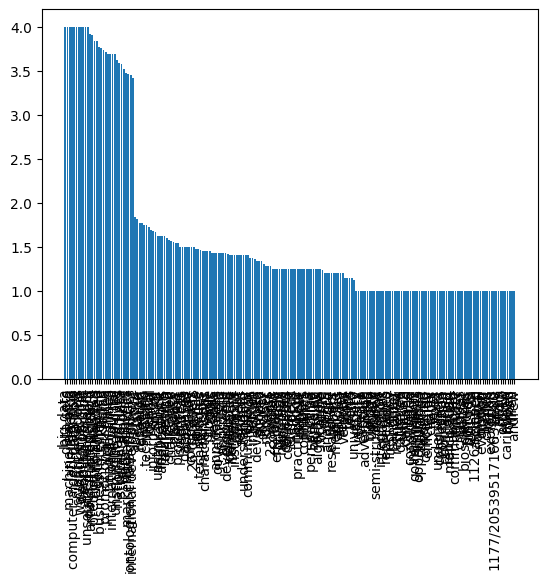

In [8]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [12]:
!{sys.executable} -m pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.4 MB/s eta 0:00:00a 0:00:01


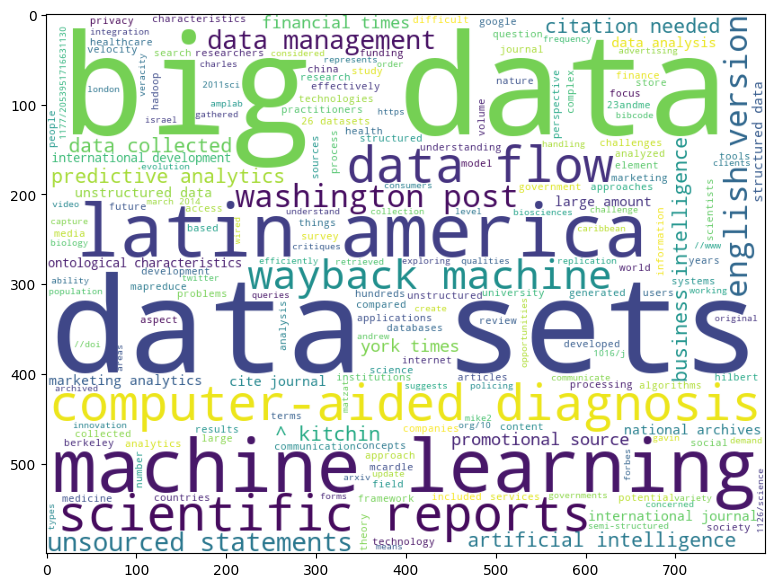

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

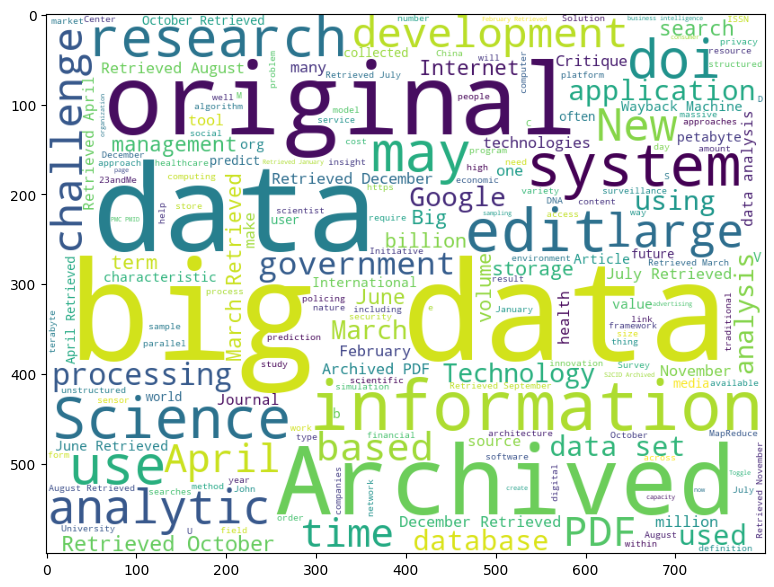

In [11]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))